In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Connect to or create the SQLite database
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create the sales table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        product TEXT,
        quantity INTEGER,
        price REAL
    )
''')

# Insert sample sales data
sample_data = [
    ('Apple', 10, 2.0),
    ('Banana', 5, 1.0),
    ('Apple', 4, 2.0),
    ('Orange', 8, 1.5),
    ('Banana', 7, 1.0),
    ('Orange', 3, 1.5),
]

cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sample_data)
conn.commit()

# Optional: confirm rows inserted
print("Sample data inserted into 'sales' table.")


Sample data inserted into 'sales' table.


In [3]:
# SQL query to calculate total quantity and revenue by product
query = '''
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
'''


In [4]:
# Run query and load result into a DataFrame
df = pd.read_sql_query(query, conn)

# Display the DataFrame
print("Sales Summary:")
print(df)


Sales Summary:
  product  total_qty  revenue
0   Apple         14     28.0
1  Banana         12     12.0
2  Orange         11     16.5


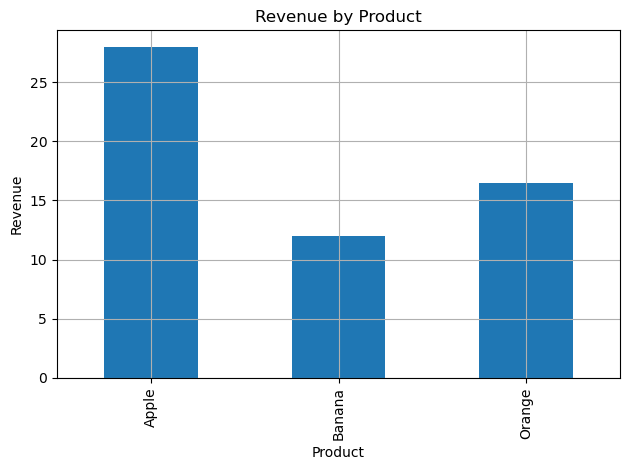

In [5]:
# Plot bar chart for revenue by product
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title('Revenue by Product')
plt.ylabel('Revenue')
plt.xlabel('Product')
plt.grid(True)
plt.tight_layout()
plt.show()


Chart saved as 'sales_chart.png'


<Figure size 640x480 with 0 Axes>

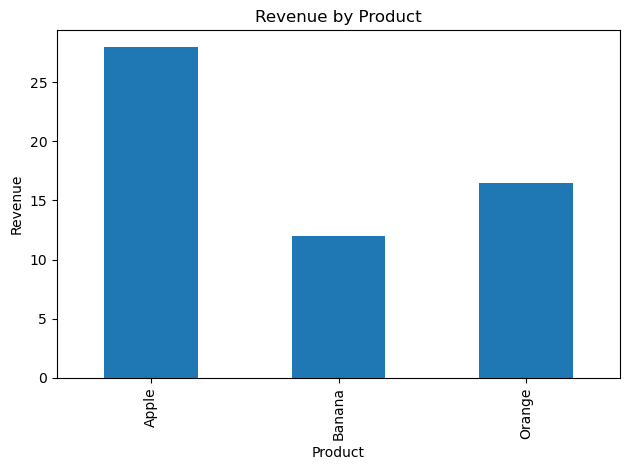

In [6]:
# Save the chart to an image file
plt.figure()
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title('Revenue by Product')
plt.ylabel('Revenue')
plt.xlabel('Product')
plt.tight_layout()
plt.savefig('sales_chart.png')
print("Chart saved as 'sales_chart.png'")
